### Milan's Air Quality Analysis

Milan faces significant air pollution challenges, particularly due to its location in the Po Plain, a region known for heavy industry and urbanization. The city frequently experiences high levels of PM2.5 (fine particulate matter), exceeding World Health Organization limits and leading to health concerns for residents. PM2.5 concentration is currently 2.2 times the World Health Organization annual PM2.5 guideline value. While Milan has implemented measures like traffic restrictions and investing in cleaner transportation, geographical factors and the concentration of industrial and agricultural activities continue to contribute to the problem. <br>
In this project I intend to delve deeper into this phenomenona and illustrate the following:
* Descriptive Analysis.
* Health & Policy Relevance.
* Seasonal & Temporal Insights.
* Forecasting Using Machine Learning.

In [86]:
# Importing necessarry libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Preparing data
milan = pd.read_csv('milan-air-pollution.csv', sep=';')
milan.columns = ["station_id", "date", "pollutant", "value"]
milan['date'] = pd.to_datetime(milan['date'], errors='coerce')
milan['value'] = pd.to_numeric(milan['value'], errors='coerce')
milan.to_csv('milan_air_pollution_cleaned.csv', index=False)
milan.tail(15000).to_csv('milan_air_pollution_sample.csv', index=False)

In [58]:
milan = pd.read_csv('milan_air_pollution_sample.csv')
# Counting missing values
missing_vals = milan.isnull().sum()
print(missing_vals)

station_id       0
date             0
pollutant        0
value         3142
dtype: int64


In [59]:
milan.head()

,station_id,date,pollutant,value
0,4,2023-03-10,PM25,17.0
1,5,2023-03-10,NO2,NaN
2,5,2023-03-10,O3,NaN
3,6,2023-03-10,C6H6,1.2
4,6,2023-03-10,CO_8h,0.8


In [60]:
# Replacing NaN values in the 'values' column with values' mean
milan = milan.assign(value=milan['value'].fillna(milan['value'].mean()))
milan['value'] = milan['value'].round(2)
milan.head()

,station_id,date,pollutant,value
0,4,2023-03-10,PM25,17.00
1,5,2023-03-10,NO2,38.63
2,5,2023-03-10,O3,38.63
3,6,2023-03-10,C6H6,1.20
4,6,2023-03-10,CO_8h,0.80


## Trend Analysis
The data is now clean to use. Let's illustrate an overview at our data and see how pollution levels change over t


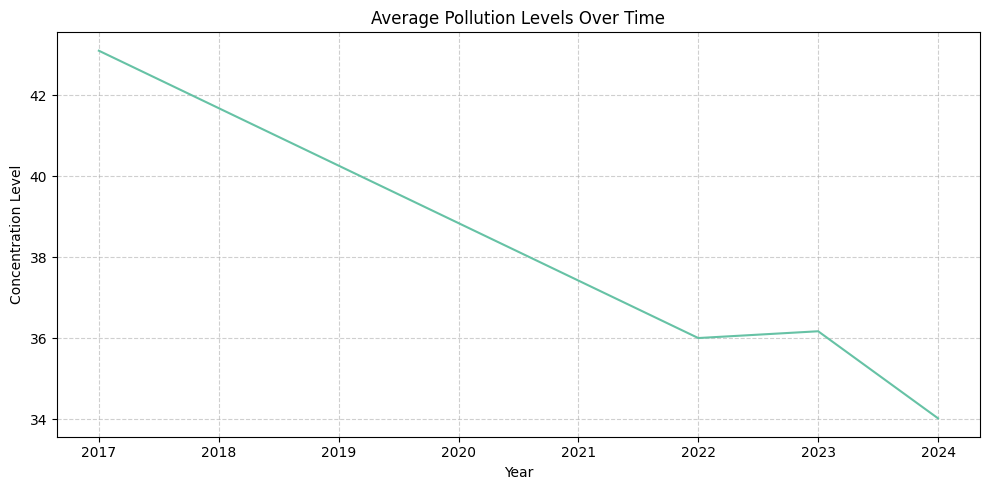

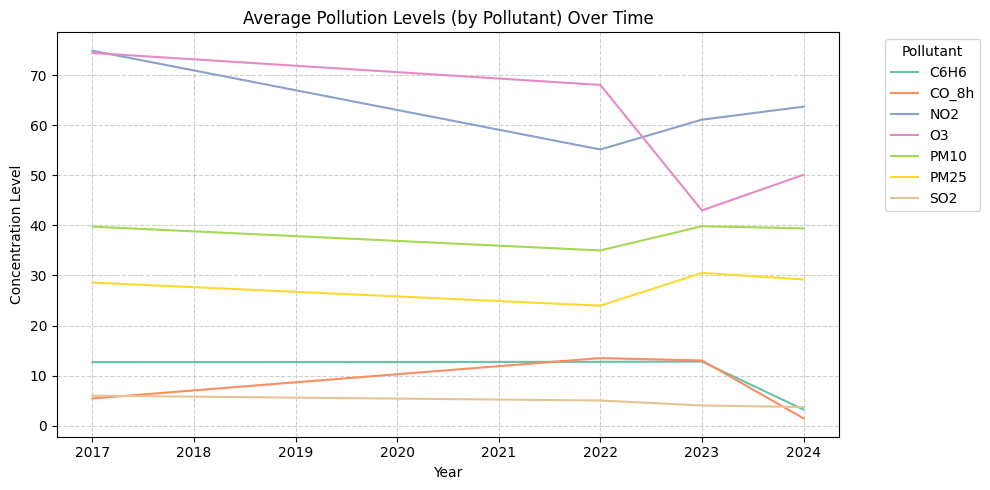

In [121]:
avgmilan = milan.groupby(['year'])['value'].mean().reset_index()
avg_by_pollutant = milan.groupby(['year', 'pollutant'])['value'].mean().reset_index()
sns.set_palette("Set2")
plt.figure(figsize=(10,5))
sns.lineplot(data=avgmilan, x='year', y='value')
plt.grid(alpha=0.6, linestyle='--')
plt.title("Average Pollution Levels Over Time")
plt.xlabel("Year")
plt.ylabel("Concentration Level")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_by_pollutant, x='year', y='value', hue='pollutant')
plt.grid(alpha=0.6, linestyle='--')
plt.title("Average Pollution Levels (by Pollutant) Over Time")
plt.xlabel("Year")
plt.ylabel("Concentration Level")
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

I used plotly to make the plots easier to understand as this library is more interactive and we're working with complex data. You can download the plot as a PNG file, zoom in, pan, reset axes etc. To go further with this analysis, simply click on the pollutant of your liking displayed in the legend tab to make it disappear, and double click on legend to isolate once trace to get a better understanding of how each pollutant changes thoughout the years.<br>
The plots above depict total annual pollution concentration in Milan from 2017 to 2024, and each pollutant behaves differently over time:
* NO₂ and CO_8h: These show a declining trend, especially post-2020 — likely linked to reduced traffic and industrial activity.
* PM10 and PM2.5: These fluctuate but seem to drop sharply around 2021–2022, possibly due to cleaner transport or lockdown effects.
* O₃ (Ozone): Often behaves inversely to NO₂ — when NO₂ drops, O₃ can rise due to reduced NOx scavenging.
* C₆H₆ (Benzene) and SO₂: If they remain relatively stable or spike, it could point to specific industrial sources or seasonal heating.
* Pollution levels in 2024 seem to remain low — suggesting that whatever caused the drop may have had lasting effects.

That’s a good sign and suggests a significant shift in pollution patterns, possibly due to:
1. Policy changes (e.g. traffic restrictions, industrial regulations)
2. COVID-era lockdowns (especially in 2020–2021)
3. Environmental initiatives or tech upgrades (like cleaner public transport)

## Weekday Analysis
To understand behavioral or traffic-related pollution dynamics, we are going to dive into **weekly patterns**.<br>
### Why Weekly Analysis Matters:
* Traffic emissions tend to spike on weekdays, especially Mondays and Fridays.

* Industrial activity often follows a weekly rhythm.

* Public health planning benefits from knowing which days are riskier.

*While analyzing pollution trends by weekday, I noticed that data for Saturday and Sunday is missing from the dataset. This absence could be due to gaps in data collection, sensor downtime, or reporting inconsistencies during weekends. As a result, the weekday analysis reflects only Monday through Friday, and any conclusions drawn should be interpreted with this limitation in mind.* <br>
**I am going to illustrate a heatmap for a clean overview of averages and a boxplot for a deeper dive into variability:**

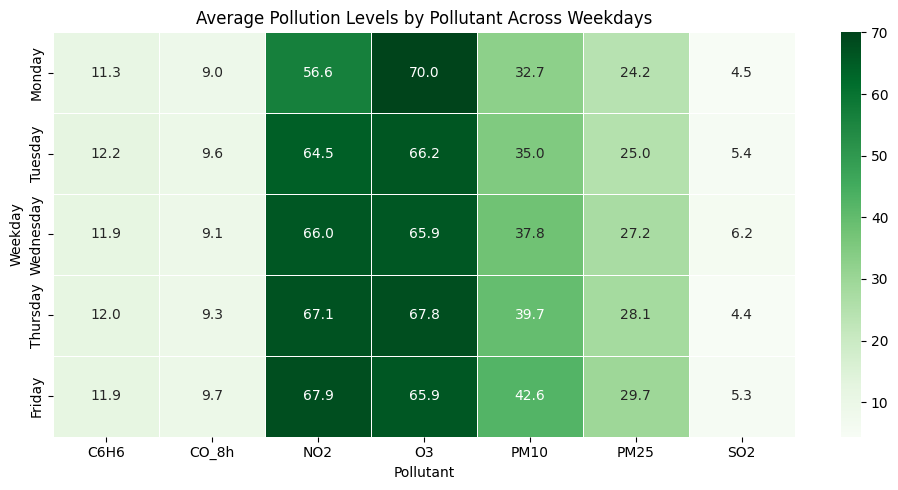

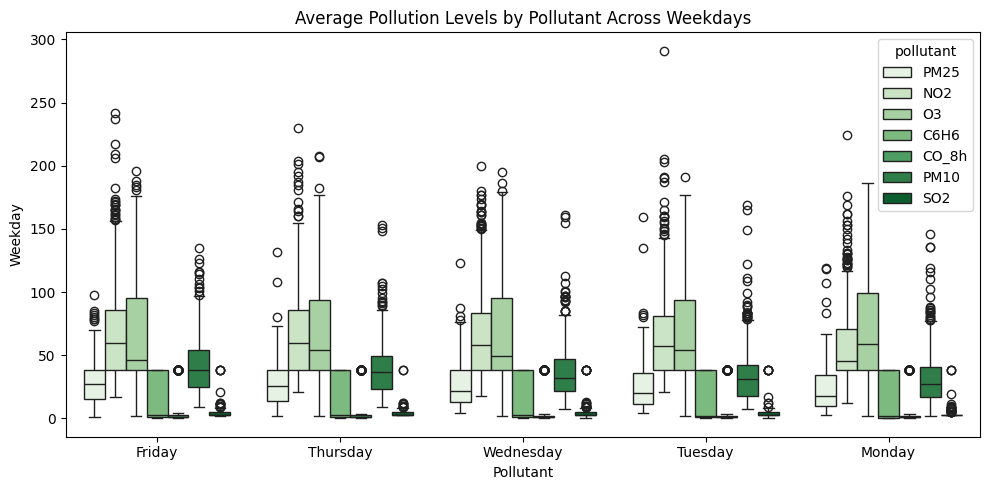

In [120]:
milan['weekday'] = milan['date'].dt.day_name()
weekday_avg = milan.groupby(['weekday', 'pollutant'])['value'].mean().reset_index()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg['weekday'] = pd.Categorical(weekday_avg['weekday'], categories=weekday_order, ordered=True)
weekday_avg.sort_values('weekday', inplace=True)
heatmap_data = weekday_avg.pivot(index='weekday', columns='pollutant', values='value')
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, cmap='Greens', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Average Pollution Levels by Pollutant Across Weekdays")
plt.xlabel("Pollutant")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(data=milan, x='weekday', y='value', hue='pollutant', palette='Greens')
plt.title("Average Pollution Levels by Pollutant Across Weekdays")
plt.xlabel("Pollutant")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

#### Each box shows:

The middle line: the median pollution level.

The box edges: the 25th and 75th percentiles (the interquartile range).

Whiskers: the range of typical values, excluding outliers.

Dots outside the whiskers: outliers — unusually high or low pollution readings.
#### Weekly Pattern
**Monday & Friday:** Tend to show higher medians and more outliers across several pollutants — possibly due to increased traffic or industrial ramp-up.<br>
**Midweek (Tuesday–Thursday):** Slightly more stable, though NO₂ and PM levels remain elevated.<br>
**Wednesday:** Appears to be the most balanced day, with fewer extreme values.<br>

Milan’s air quality is strongly influenced by weekday human activity. Traffic and industrial patterns likely drive the fluctuations.